<a href="https://colab.research.google.com/github/Hereum/Quant-Project/blob/main/Equity_Fixed_Income_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [22]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [36]:
tickers = ['SPY', 'TLT']
etf = yf.Tickers(tickers)

In [37]:
data = etf.history(start = '2002-08-01', end = '2025-03-04', actions = False)

[*********************100%***********************]  2 of 2 completed


In [38]:
data.head()

Price           Close                  High                   Low             \
Ticker            SPY        TLT        SPY        TLT        SPY        TLT   
Date                                                                           
2002-08-01  58.278393  38.713879  59.965433  38.723206  57.982999  38.499320   
2002-08-02  56.972080  39.110352  58.363726  39.226960  56.204051  38.657912   
2002-08-05  54.989624  39.282936  57.063964  39.385552  54.845212  39.110355   
2002-08-06  56.840759  38.947094  57.700693  39.133668  55.869237  38.816493   
2002-08-07  57.832005  39.040394  58.094580  39.245625  56.302508  38.881809   

Price            Open               Volume         
Ticker            SPY        TLT       SPY    TLT  
Date                                               
2002-08-01  59.656908  38.499320  66571900  25000  
2002-08-02  58.094585  38.788516  51772900  52800  
2002-08-05  56.775130  39.198978  47191300  61100  
2002-08-06  55.948011  39.119675  64730000  64900  
2002-08-07  57.681027  38.993751  43289400  40300

In [39]:
data.tail()

Price            Close                   High                    Low  \
Ticker             SPY        TLT         SPY        TLT         SPY   
Date                                                                   
2025-02-25  594.239990  91.133163  597.890015  91.212914  589.559998   
2025-02-26  594.539978  91.671471  599.580017  91.771155  591.859985   
2025-02-27  585.049988  91.023506  598.020020  91.502003  584.650024   
2025-02-28  594.179993  92.139999  594.719971  92.189846  582.440002   
2025-03-03  583.770020  92.570000  597.340027  92.709999  579.900024   

Price                        Open               Volume            
Ticker            TLT         SPY        TLT       SPY       TLT  
Date                                                              
2025-02-25  90.515114  597.150024  90.684578  58266500  50125100  
2025-02-26  90.913853  595.929993  91.133164  43321600  32220200  
2025-02-27  90.854041  596.849976  91.023506  74196700  53373600  
2025-02-28  91.183012  585.559998  91.561817  88744100  49388600  
2025-03-03  91.370003  596.179993  91.410004  74249200  42904200

In [40]:
data.drop(['Open', 'High', 'Low', 'Volume'], inplace = True, axis = 1)

In [41]:
data = data.droplevel(0, axis = 1)

<Axes: xlabel='Date'>

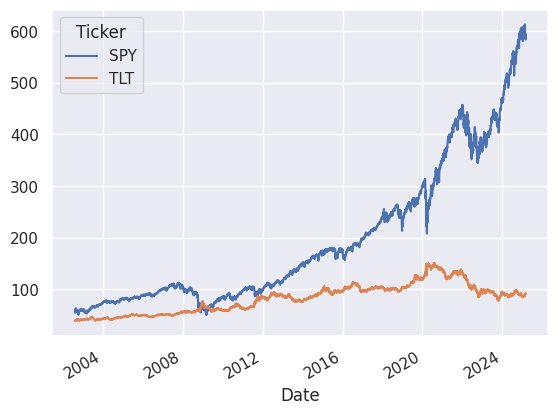

In [42]:
data.plot()

In [43]:
rets = data.pct_change().fillna(0)

<Axes: xlabel='Date'>

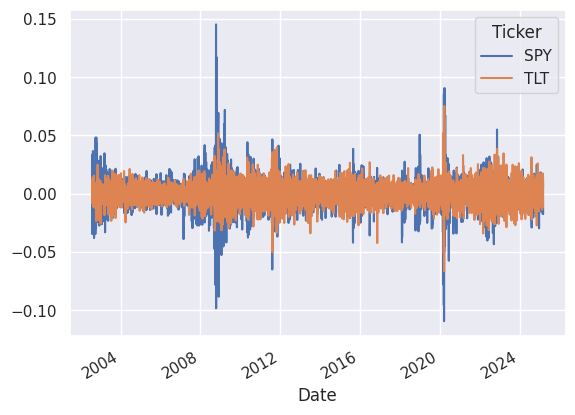

In [44]:
rets.plot()

In [45]:
rets.head()

Ticker,SPY,TLT
Date,,
2002-08-01,0.000000,0.000000
2002-08-02,-0.022415,0.010241
2002-08-05,-0.034797,0.004413
2002-08-06,0.033663,-0.008549
2002-08-07,0.017439,0.002396


In [48]:
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

stock_sr = stock_mu / stock_sigma

bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

bond_sr = bond_mu / bond_sigma

print(stock_sr, bond_sr)

0.6364433647818639 0.33951250913937303


In [49]:
weights = 0.6

In [50]:
port_ret = weights * rets['SPY'] + (1-weights) * rets['TLT']

<Axes: xlabel='Date'>

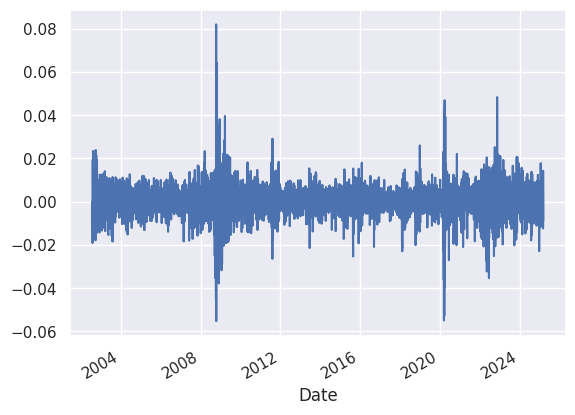

In [52]:
port_ret.plot()

In [53]:
port_ret.tail()

,0
Date,
2025-02-25,0.003915
2025-02-26,0.002666
2025-02-27,-0.012404
2025-02-28,0.014270
2025-03-03,-0.008645


In [54]:
port_ret.dropna(inplace = True)
port_ret

,0
Date,
2002-08-01,0.000000
2002-08-02,-0.009353
2002-08-05,-0.019113
2002-08-06,0.016778
2002-08-07,0.011422
...,...
2025-02-25,0.003915
2025-02-26,0.002666
2025-02-27,-0.012404


<Axes: xlabel='Date'>

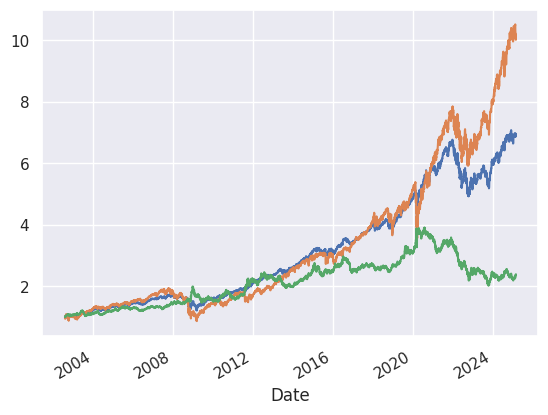

In [57]:
(1+port_ret).cumprod().plot()
(1+rets['SPY']).cumprod().plot()
(1+rets['TLT']).cumprod().plot()

In [59]:
port_mu = port_ret.mean()* 252
port_sigma = port_ret.std() * np.sqrt(252)
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.09163972011112939
Vol = 0.10915012395123357
SR = 0.8395750439282366


In [62]:
corr = rets.corr()

In [63]:
corr

Ticker,SPY,TLT
Ticker,,
SPY,1.000000,-0.323128
TLT,-0.323128,1.000000


In [65]:
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])

<Axes: xlabel='Date'>

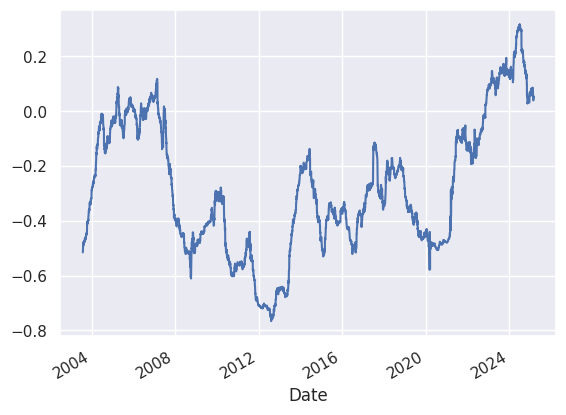

In [66]:
historical_corr.plot()